In [1]:
import os
import numpy as np
import keras
from keras import models
from keras import layers
from keras.preprocessing.image import ImageDataGenerator
from keras import regularizers
from keras import optimizers
from keras.callbacks import ModelCheckpoint

fruitNetModel=models.Sequential()

fruitNetModel.add(layers.SeparableConv2D(128, (3, 3), depth_multiplier=2, activation='relu', input_shape=(100, 100, 3)))
fruitNetModel.add(layers.SeparableConv2D(128, (3, 3), depth_multiplier=2, activation='relu'))
fruitNetModel.add(layers.MaxPooling2D(pool_size=(2, 2)))

fruitNetModel.add(layers.SeparableConv2D(256, (3, 3), depth_multiplier=2, activation='relu'))
fruitNetModel.add(layers.SeparableConv2D(256, (3, 3), depth_multiplier=2, activation='relu'))
fruitNetModel.add(layers.GlobalAveragePooling2D())

fruitNetModel.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
fruitNetModel.add(layers.Dropout(0.2))
fruitNetModel.add(layers.Dense(120, activation='softmax'))

fruitNetModel.compile(loss='categorical_crossentropy',optimizer=optimizers.Adam(lr=1e-4),metrics=['categorical_accuracy'])
fruitNetModel.summary()

filepath="FruitNet2_fruit_image_classification_120_classes.h5"
checkpoint = ModelCheckpoint(filepath, save_best_only=True)
callbacks_list = [checkpoint]

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
separable_conv2d_1 (Separabl (None, 98, 98, 128)       950       
_________________________________________________________________
separable_conv2d_2 (Separabl (None, 96, 96, 128)       35200     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 48, 48, 128)       0         
_________________________________________________________________
separable_conv2d_3 (Separabl (None, 46, 46, 256)       68096     
_________________________________________________________________
separable_conv2d_4 (Separabl (None, 44, 44, 256)       135936    
_________________________________________________________________
global_average_poolin

In [2]:
train_dir='D:\\TensorFlow Programs\\fruit_image_classification_120_classes\\fruits\\fruits-360_dataset\\fruits-360\\Training'
validation_dir='D:\\TensorFlow Programs\\fruit_image_classification_120_classes\\fruits\\fruits-360_dataset\\fruits-360\\Validation'
test_dir='D:\\TensorFlow Programs\\fruit_image_classification_120_classes\\fruits\\fruits-360_dataset\\fruits-360\\Test'

In [3]:
batch_size=32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,)

# Note that the validation data should not be augmented!
validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        # This is the target directory
        train_dir,
        target_size=(100, 100),
        batch_size=batch_size)

validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

Found 60498 images belonging to 120 classes.
Found 6000 images belonging to 120 classes.


In [4]:
number_of_training_samples=60498
number_of_validation_samples=6000

In [5]:
import math

history = fruitNetModel.fit_generator(
      train_generator,
      steps_per_epoch=math.ceil(number_of_training_samples//batch_size),
      epochs=50,
      callbacks=callbacks_list,
      validation_data=validation_generator,
      validation_steps=math.ceil(number_of_validation_samples//batch_size))

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
1890/1890 [==============================] - 1017s 538ms/step - loss: 4.3201 - categorical_accuracy: 0.0352 - val_loss: 3.5245 - val_categorical_accuracy: 0.0961
Epoch 2/50
1890/1890 [==============================] - 865s 457ms/step - loss: 3.0180 - categorical_accuracy: 0.1672 - val_loss: 2.2375 - val_categorical_accuracy: 0.3623
Epoch 3/50
1890/1890 [==============================] - 847s 448ms/step - loss: 2.3288 - categorical_accuracy: 0.2959 - val_loss: 1.7937 - val_categorical_accuracy: 0.4888
Epoch 4/50
1890/1890 [==============================] - 846s 448ms/step - loss: 1.9604 - categorical_accuracy: 0.3867 - val_loss: 1.4863 - val_categorical_accuracy: 0.5788
Epoch 5/50
1890/1890 [==============================] - 846s 447ms/step - loss: 1.6709 - categorical_accuracy: 0.4685 - val_loss: 1.2366 - val_categorical_accuracy: 0.6530
Epoch 6/50
1890/1890 [==============================] - 846s 448ms/step - loss: 1.4317 - ca

Epoch 47/50
1890/1890 [==============================] - 850s 450ms/step - loss: 0.1333 - categorical_accuracy: 0.9621 - val_loss: 0.1488 - val_categorical_accuracy: 0.9660
Epoch 48/50
1890/1890 [==============================] - 850s 450ms/step - loss: 0.1310 - categorical_accuracy: 0.9640 - val_loss: 0.1562 - val_categorical_accuracy: 0.9678
Epoch 49/50
1890/1890 [==============================] - 850s 450ms/step - loss: 0.1269 - categorical_accuracy: 0.9651 - val_loss: 0.1540 - val_categorical_accuracy: 0.9628
Epoch 50/50
1890/1890 [==============================] - 850s 450ms/step - loss: 0.1276 - categorical_accuracy: 0.9641 - val_loss: 0.1517 - val_categorical_accuracy: 0.9650


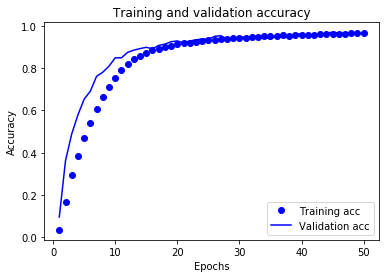

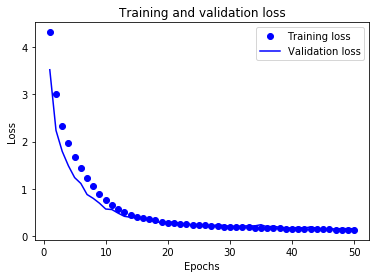

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

acc=history.history['categorical_accuracy']
val_acc=history.history['val_categorical_accuracy']
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(acc)+1)
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [7]:
number_of_test_samples=14622

In [9]:
from tensorflow.python.keras.models import load_model

test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=(100, 100),
        batch_size=batch_size, shuffle=False)

best_model = load_model('FruitNet2_fruit_image_classification_120_classes.h5')
steps_test=int(number_of_test_samples/batch_size)
result = best_model.evaluate_generator(test_generator, steps=steps_test,verbose=1)
print("Test-set accuracy: {0:.2%}".format(result[1]))

Found 14622 images belonging to 120 classes.
457/457 [==============================] - 42s 92ms/step - loss: 0.1263 - categorical_accuracy: 0.9754
Test-set accuracy: 97.54%
